## Which study habits are most significantly associated with student performance?

## Introduction

Some students struggle with getting good grades because they need to learn how to study (Fournier and Hess). Therefore, we want to create a statistical model that explains which study habits significantly impact students' grades.

We plan to analyze the student performance data collected by surveying 101 Turkish students in 2019 (Yılmaz and B. Boran Sekeroglu). We can use the obtained data to assess the population relationship between study habits and end-of-term grades because the authors ensured data randomization by asking students from diverse courses (Yılmaz and Sekeroglu).

Thus, we plan to perform an inferential analysis to create a generative model describing the behavioral attributes associated with good performance.

## Exploratory Data Analysis

In [1]:
# Loading the packages and setting the seed
library(tidyverse)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We can download the data directly from the data set's website.

In [2]:
# Downloading the data
raw_data <- read_delim(
  file = "https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv",
  delim = ";"
)

raw_data %>%
  head()

Rows: 145 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): STUDENT ID
dbl (32): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STUDENT ID,1,2,3,4,5,6,7,8,9,⋯,23,24,25,26,27,28,29,30,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


The data set contains 3 types of variables: 
- personal information
- family information
- education habits

For our analysis, we need to only the last one, so we select the subset of the data below.

In [3]:
# Filtering to include only study habits
student_data <- raw_data %>%
  select(`17`:`GRADE`) %>%
  select(-`21`, -`27`, -`28`, -`29`, -`30`, -`COURSE ID`)

student_data %>% 
  head()

17,18,19,20,22,23,24,25,26,GRADE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,2,1,1,1,1,3,2,1
2,2,2,1,1,1,1,3,2,1
2,1,2,1,1,1,1,2,2,1
3,1,2,1,1,1,2,3,2,1
2,1,1,1,1,2,1,2,2,1
1,1,2,1,1,1,1,1,2,2


Additionally, the original data set's column names are numbers, which correspond to various attributes. We rename them according to the data set's documentation to make our further analysis clearer.

In [4]:
# Renaming columns
student_data <- student_data %>%
  rename(
    study_hours = `17`,
    reading_non_scientific = `18`,
    reading_scientific = `19`,
    attendance_seminars = `20`,
    attendance_classes = `22`,
    preparation_to_midterm_1 = `23`,
    preparation_to_midterm_2 = `24`,
    taking_notes = `25`,
    listening = `26`,
    grade = `GRADE`
  )

student_data %>%
  head()

study_hours,reading_non_scientific,reading_scientific,attendance_seminars,attendance_classes,preparation_to_midterm_1,preparation_to_midterm_2,taking_notes,listening,grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,2,1,1,1,1,3,2,1
2,2,2,1,1,1,1,3,2,1
2,1,2,1,1,1,1,2,2,1
3,1,2,1,1,1,2,3,2,1
2,1,1,1,1,2,1,2,2,1
1,1,2,1,1,1,1,1,2,2


The observations themselves are also numbers that need to be translated using the documentation. Thus, we convert all study habits records to factors so that they are correctly interpreted while building the model.

In [5]:
# Converting study habits columns to factors
student_data <- student_data %>%
  mutate_if(is.numeric, as.factor) %>%
  mutate(grade = as.numeric(grade) - 1)

Thus, this is our wrangled data set.

In [6]:
cat("Number of observations: ", nrow(student_data), "\n")

student_data %>%
  str()

# Num. of students per final grade
student_data %>%
  group_by(grade) %>%
  summarise(n = n())

Number of observations:  145 
tibble [145 × 10] (S3: tbl_df/tbl/data.frame)
 $ study_hours             : Factor w/ 5 levels "1","2","3","4",..: 3 2 2 3 2 1 2 1 1 2 ...
 $ reading_non_scientific  : Factor w/ 3 levels "1","2","3": 2 2 1 1 1 1 2 2 2 2 ...
 $ reading_scientific      : Factor w/ 3 levels "1","2","3": 2 2 2 2 1 2 2 2 2 2 ...
 $ attendance_seminars     : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 2 1 1 1 ...
 $ attendance_classes      : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 2 1 1 2 ...
 $ preparation_to_midterm_1: Factor w/ 3 levels "1","2","3": 1 1 1 1 2 1 1 3 1 1 ...
 $ preparation_to_midterm_2: Factor w/ 3 levels "1","2","3": 1 1 1 2 1 1 1 1 1 1 ...
 $ taking_notes            : Factor w/ 3 levels "1","2","3": 3 3 2 3 2 1 3 3 3 2 ...
 $ listening               : Factor w/ 3 levels "1","2","3": 2 2 2 2 2 2 3 2 2 2 ...
 $ grade                   : num [1:145] 1 1 1 1 1 2 5 2 5 0 ...


grade,n
<dbl>,<int>
0,8
1,35
2,24
3,21
4,10
5,17
6,13
7,17


Scholars argue that spending time studying does not necessarily lead to better performance (Fournier and Hess). We can check whether our data reflects this.

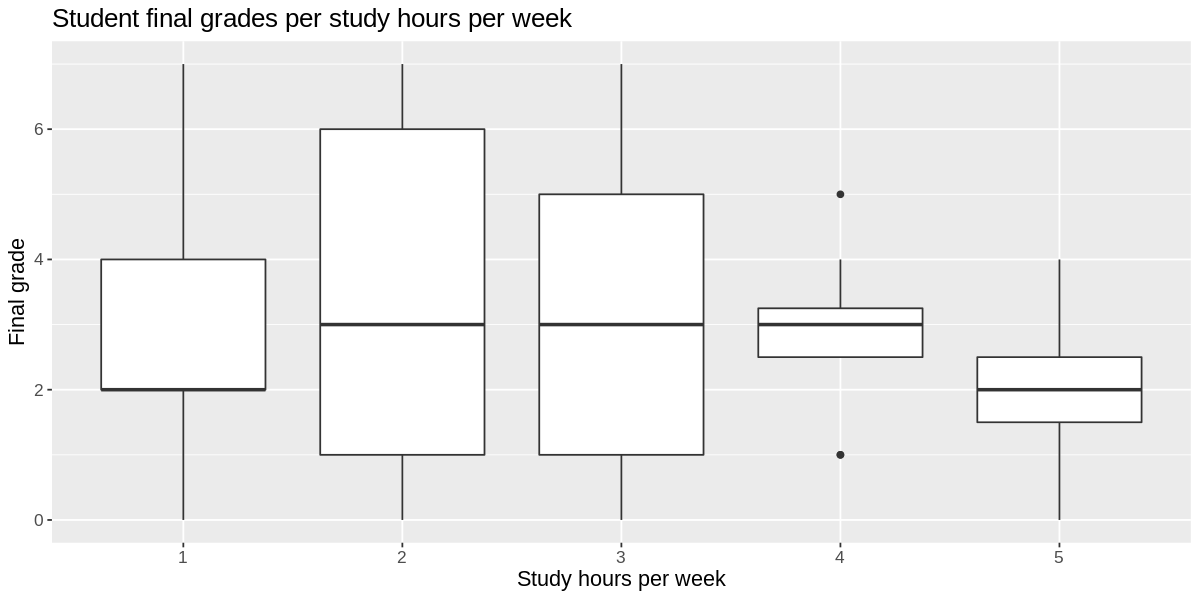

In [7]:
options(repr.plot.width = 10, repr.plot.height = 5)

# Plotting the association between studying hours and grades
study_hours_plot <- student_data %>%
  ggplot(aes(x = study_hours, y = grade)) +
  geom_boxplot() +
  labs(
    title = "Student final grades per study hours per week",
    x = "Study hours per week",
    y = "Final grade"
  ) +
  theme(text = element_text(size = 13))

study_hours_plot

The plot shows that study hours may not lead to good grades, so it corresponds to the scholarly claim (Fournier and Hess). However, it's necessary to create a model with the `study_hours` as a single predictor and then conduct the regression analysis to conclude whether there's an association.

## Methods: Plan

#### Our analysis is trustworthy because:

- It is based on the relatively new data set
  
- The data was collected following the guidelines ensuring the randomization
  
- It uses inferential techniques allowing to test the response variables' significance of and create a powerful generative model
  

#### Methods we plan to use:

We want to do variable selection for our generative model by:

1. Splitting the data into training and testing datasets
  
2. Create a model that uses all input variables and estimate its MLR
  
3. Select a subset of statistically significant variables using forward selection
  
4. Create another model that uses only the statistically significant variables from above
  
5. Compare the models using the adjusted $R^2$
  

#### Expectations:

We want to find the study habits that are statistically associated with final grades. Fournier and Hess claim that note taking is crucial (Fournier and Hess), and Wolfe and College argue that listening in classes significantly impact school performance as well (Wolfe and College). Therefore, we expect our generative model to contain `taking_notes` and `listening` variables.

#### Project impact:

This analysis will help students to spot education habits that significantly impact school performance. Our hope is that students will become aware of those and use them while planning their future studies.

## References

Fournier, Caitlin, and Kayla Hess. “Cracking the Code on How to Study.” *The Phi Delta Kappan*, vol. 94, no. 4, 2012, pp. 72–73, www.jstor.org/stable/41763743. Accessed 3 Nov. 2022.

Wolfe, Alison M, and Elmira College. *Student Attitudes toward Study Skills*. 2009. https://alisonwolfe.com/wordpress/wp-content/uploads/Student_Attitudes_Study_Skills1.pdf.

Yılmaz, Nevriye, and Boran Boran Sekeroglu. “UCI Machine Learning Repository: Higher Education Students Performance Evaluation Dataset Data Set.” *Archive.ics.uci.edu*, 30 Jan. 2021, https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset. Accessed 3 Nov. 2022.

Yılmaz, Nevriye, and Boran Sekeroglu. “Student Performance Classification Using Artificial Intelligence Techniques.” *Advances in Intelligent Systems and Computing*, vol. 1095, 20 Nov. 2019, pp. 596–603, 10.1007/978-3-030-35249-3_76. Accessed 3 Nov. 2022.

**Word count:** 490